In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import generateds
import forward

In [6]:
STEPS= 40000
BATCH_SIZE=30
LEARNING_RATE_BASE = 0.001
LEARNING_RATE_DECAY = 0.999
REGULARIZER = 0.01

In [7]:
def backward():
    x=tf.placeholder(tf.float32,shape=(None, 2))
    
    y_ = tf.placeholder(tf.float32,shape=(None, 1))
    
    X,Y_,Y_c = generateds.generateds()
    
    y= forward.forward(x, REGULARIZER)
    
    global_step = tf.Variable(0,trainable = False)
    
    learning_rate = tf.train.exponential_decay(LEARNING_RATE_BASE,global_step,300/BATCH_SIZE,LEARNING_RATE_DECAY,staircase=True)
    
    loss_mse = tf.reduce_mean(tf.square(y-y_))
    loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))
    
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss_total)
    
    with tf.Session() as sess:
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        for i in range(STEPS):
            start = (i*BATCH_SIZE) % len(X)
            end = start + BATCH_SIZE
            sess.run(train_step, feed_dict={x:X[start:end],y_:Y_[start:end]})
            
            if i % 2000 == 0:
                loss_v = sess.run(loss_total, feed_dict={x:X,y_:Y_})
                print("After %d steps, loss is : %f" %(i,loss_v))
                
        xx, yy = np.mgrid[-3:3:.01,-3:3:.01]
        grid = np.c_[xx.ravel(),yy.ravel()]
        probs = sess.run(y, feed_dict={x:grid})
        probs = probs.reshape(xx.shape)
        
    plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
    plt.contour(xx,yy,probs,levels=[.5])
    plt.show()

After 0 steps, loss is : 12.166154
After 2000 steps, loss is : 0.258146
After 4000 steps, loss is : 0.181156
After 6000 steps, loss is : 0.141466
After 8000 steps, loss is : 0.114866
After 10000 steps, loss is : 0.101614
After 12000 steps, loss is : 0.096839
After 14000 steps, loss is : 0.095121
After 16000 steps, loss is : 0.094074
After 18000 steps, loss is : 0.093342
After 20000 steps, loss is : 0.092848
After 22000 steps, loss is : 0.092505
After 24000 steps, loss is : 0.092259
After 26000 steps, loss is : 0.092088
After 28000 steps, loss is : 0.091970
After 30000 steps, loss is : 0.091864
After 32000 steps, loss is : 0.091803
After 34000 steps, loss is : 0.091757
After 36000 steps, loss is : 0.091724
After 38000 steps, loss is : 0.091697


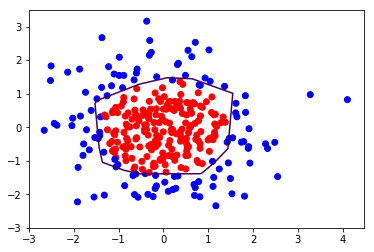

In [8]:
backward()